In [13]:
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pyforest

from pandas_datareader import DataReader
from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, LSTM

from statsmodels.tsa.api import ExponentialSmoothing
from pandas.plotting import autocorrelation_plot

sns.set()
plt.rcParams['figure.figsize']=(16,9)

In [185]:
%%capture
cogn = pd.read_csv("./Datasets/Cognizant share prices 2019_2021.csv")
cogn.Date = pd.to_datetime(cogn.Date)
hclt = pd.read_csv("./Datasets/HCL Technologies share prices 2019_2021.csv").dropna()
hclt.Date = pd.to_datetime(hclt.Date)
hdfc = pd.read_csv("./Datasets/HDFC Bank Share Prices 2019_2021.csv").dropna()
hdfc.Date = pd.to_datetime(hdfc.Date)
icic = pd.read_csv("./Datasets/ICICI Bank Share Prices 2019_2021.csv").dropna()
icic.Date = pd.to_datetime(icic.Date)
info = pd.read_csv("./Datasets/Infosys Share Prices 2019_2021.csv").dropna()
info.Date = pd.to_datetime(info.Date)
sbis = pd.read_csv("./Datasets/SBI Share Prices 2019_2021.csv").dropna()
sbis.Date = pd.to_datetime(sbis.Date)
exch = pd.read_csv("./Datasets/USD-INR Exchange rate 2019_2021.csv").dropna()
exch.Date = pd.to_datetime(exch.Date)

In [244]:
df = exch
name = "exch"

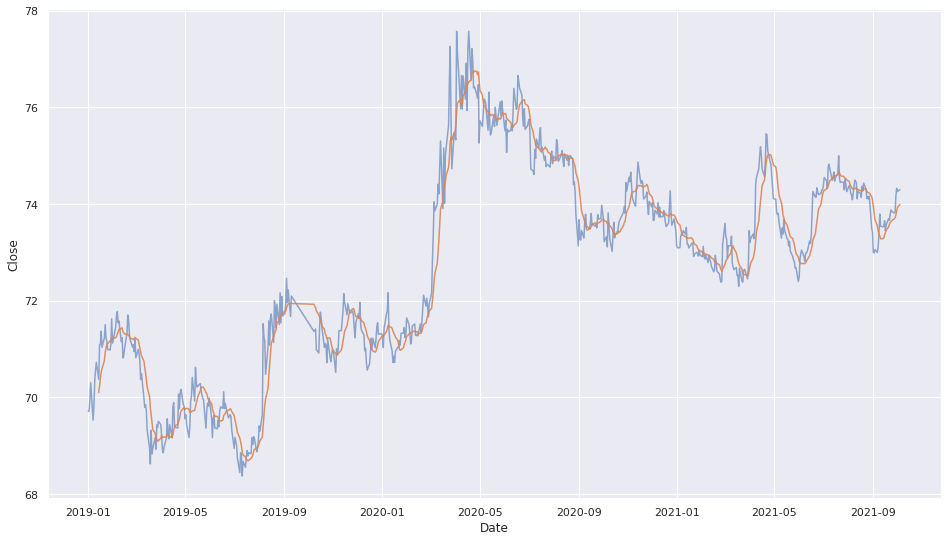

In [245]:
sns.lineplot(data=df, x='Date', y='Close', alpha=0.6)
df['10_mov_av_close'] = df['Close'].rolling(window=10).mean()
sns.lineplot(data=df, x='Date', y='10_mov_av_close', alpha=0.9)
plt.savefig(f"{name}_mov_a")
plt.show()

In [240]:
train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)):]

/home/raghav/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/raghav/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/raghav/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


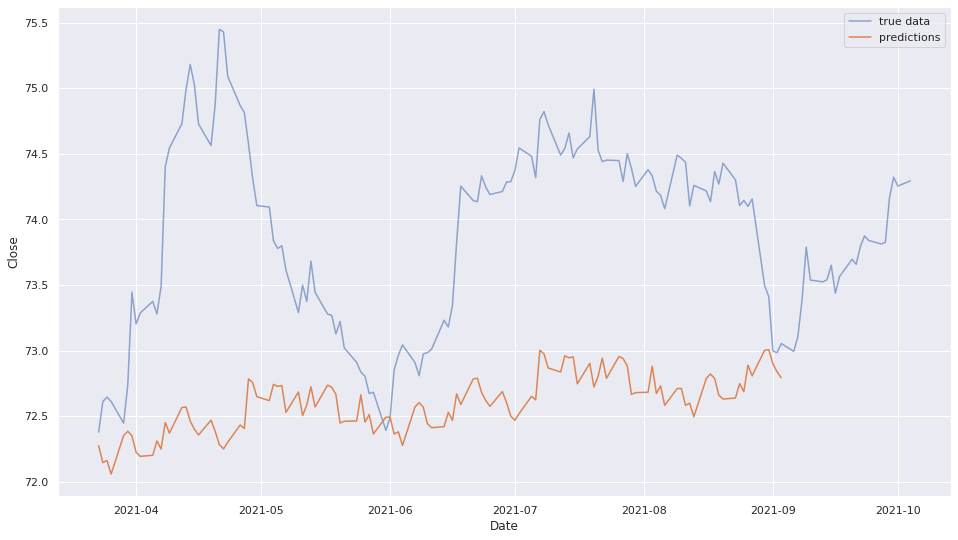

In [241]:
fit1 = ExponentialSmoothing(
    train.Close,
    seasonal_periods=50,
    trend='add',
    seasonal='add'
).fit()
y_pred = test.copy()
y_pred['triple_exp'] = fit1.forecast(len(test))
plt.figure()
sns.lineplot(data=y_pred, x='Date', y='Close', alpha=0.6, label='true data')
sns.lineplot(data=y_pred, x='Date', y='triple_exp', label='predictions')
plt.savefig(f"{name}_exp_smooth")
plt.show()

# Auto-correlation

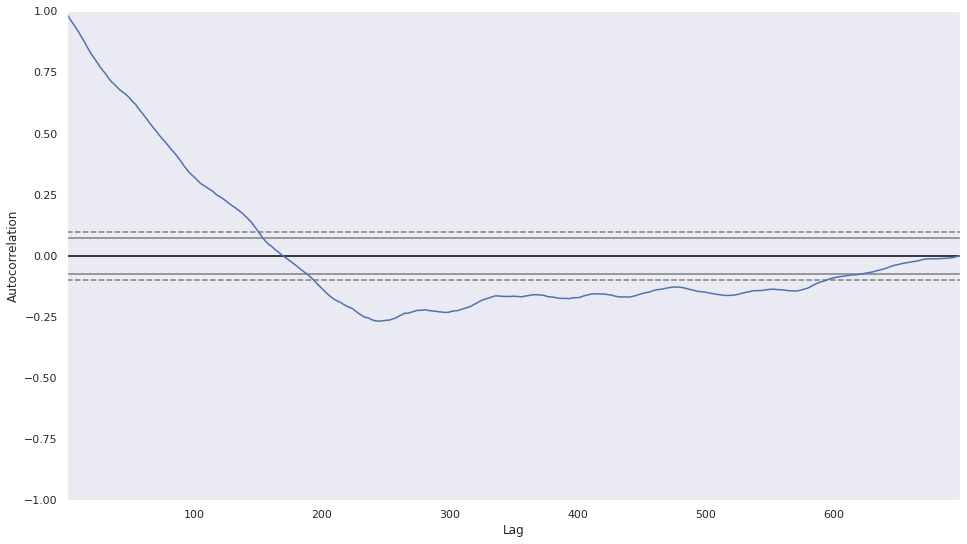

In [257]:
# df = exch
# name = "exch"
autocorrelation_plot(df.Close)
plt.savefig(f"{name}_autocorr")
plt.show()

# Cross correlation

In [249]:
crosscorr_df = pd.merge(sbis, df, on='Date', how='inner')
crosscorr_df

<IPython.core.display.Javascript object>

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,10_mov_av_close_x,Open_y,High_y,Low_y,Close_y,Volume_y,10_mov_av_close_y
0,2020-10-05,192.000000,193.800003,187.050003,188.750000,41694686.0,185.110001,828.799988,839.200012,815.099976,824.200012,11889998.0,NaN
1,2020-10-06,191.100006,192.100006,188.300003,191.600006,31098726.0,185.690001,830.000000,834.500000,822.700012,829.150024,7848500.0,NaN
2,2020-10-07,192.550003,193.149994,189.100006,190.699997,34578053.0,186.140001,830.000000,830.599976,823.000000,828.049988,6980002.0,NaN
3,2020-10-08,191.350006,195.800003,190.550003,191.500000,43351606.0,186.910001,857.500000,879.000000,844.500000,849.549988,25860257.0,NaN
4,2020-10-09,192.000000,198.800003,190.550003,198.300003,64907230.0,189.105000,852.900024,862.500000,849.299988,855.750000,7286954.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2021-09-27,444.899994,450.549988,442.250000,446.600006,11746892.0,444.690002,1366.000000,1367.949951,1290.050049,1295.199951,7653504.0,1291.115002
243,2021-09-28,449.200012,455.799988,439.600006,444.899994,19241170.0,445.880002,1304.949951,1304.949951,1254.000000,1269.000000,8572321.0,1294.150000
244,2021-09-29,441.850006,462.299988,439.100006,460.000000,38635938.0,447.495001,1270.000000,1301.449951,1258.800049,1281.199951,4639821.0,1294.944995
245,2021-09-30,459.950012,464.899994,451.399994,453.000000,26530369.0,446.425000,1291.449951,1291.449951,1268.849976,1279.550049,3589722.0,1296.590002


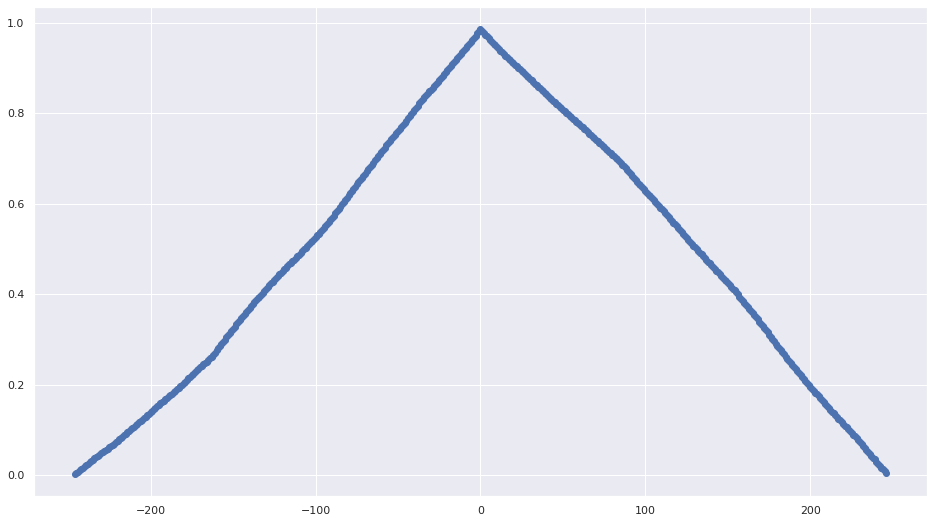

In [250]:
res = plt.xcorr(crosscorr_df['Close_x'], crosscorr_df['Close_y'], maxlags=None, usevlines=False)
plt.savefig(f"{name}_crosscorr")
plt.show()

# scratch

(array([-99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87,
        -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74,
        -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61,
        -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48,
        -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35,
        -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22,
        -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,
         -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,
          5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
         18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78

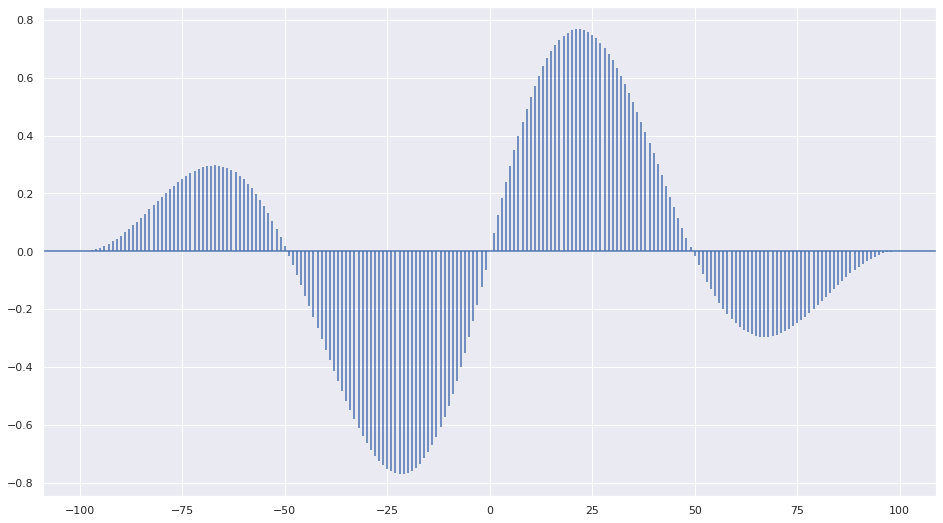

In [247]:
x = np.linspace(0,6.29,100)
plt.xcorr(np.sin(x), 400*np.cos(x), maxlags=None)

# Risk and return

In [430]:
datasets = [cogn, hclt, hdfc, icic, info, sbis, exch]
names = ["cogn", "hclt", "hdfc", "icic", "info", "sbis", "exch"]

In [429]:
for data in datasets:
    data['Return'] = data['Close'].pct_change()

/home/raghav/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


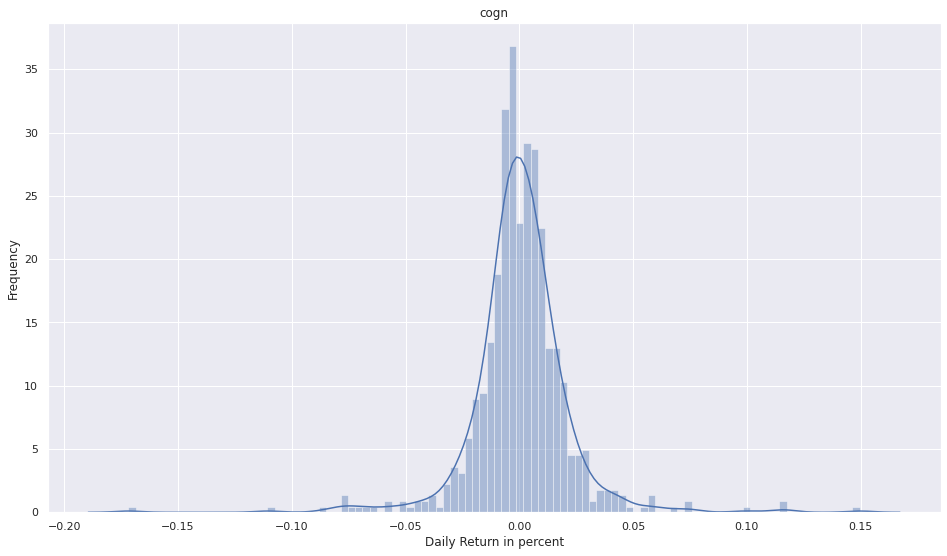

/home/raghav/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


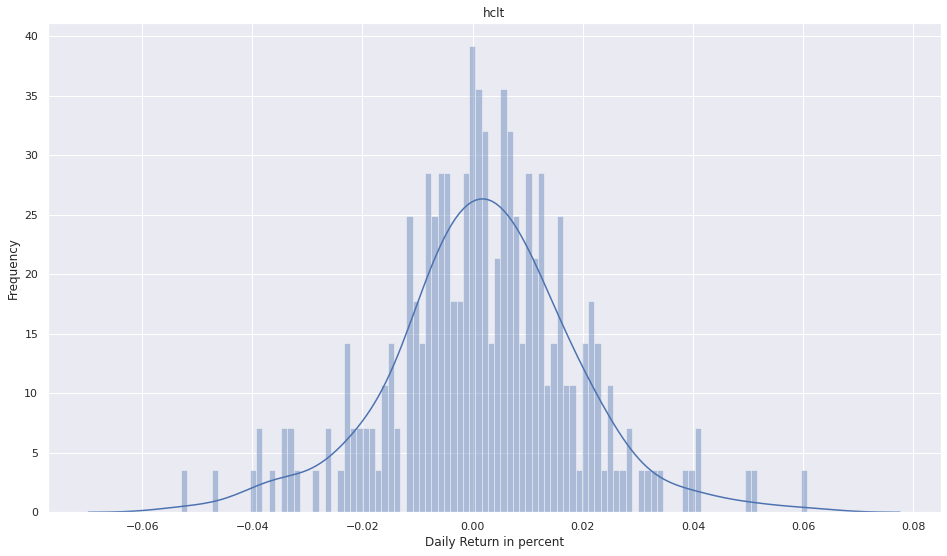

/home/raghav/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


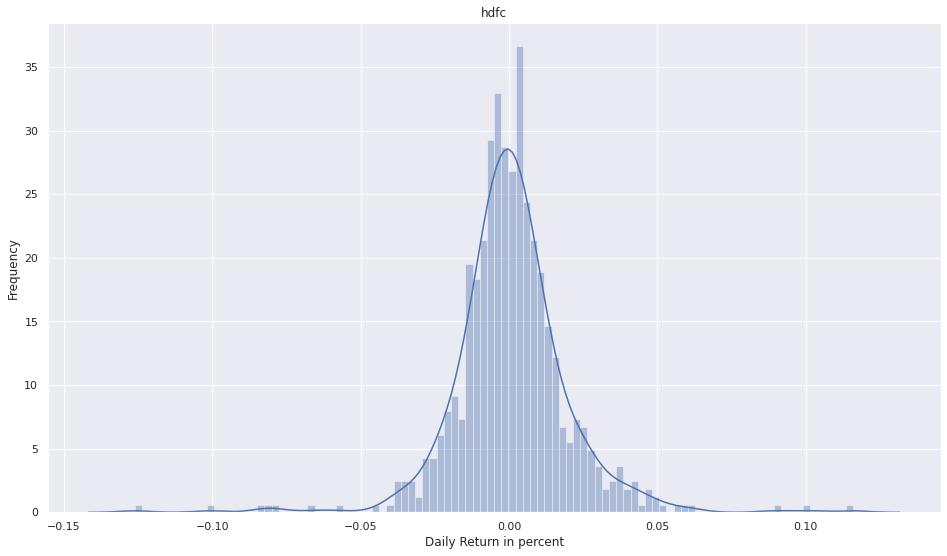

/home/raghav/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


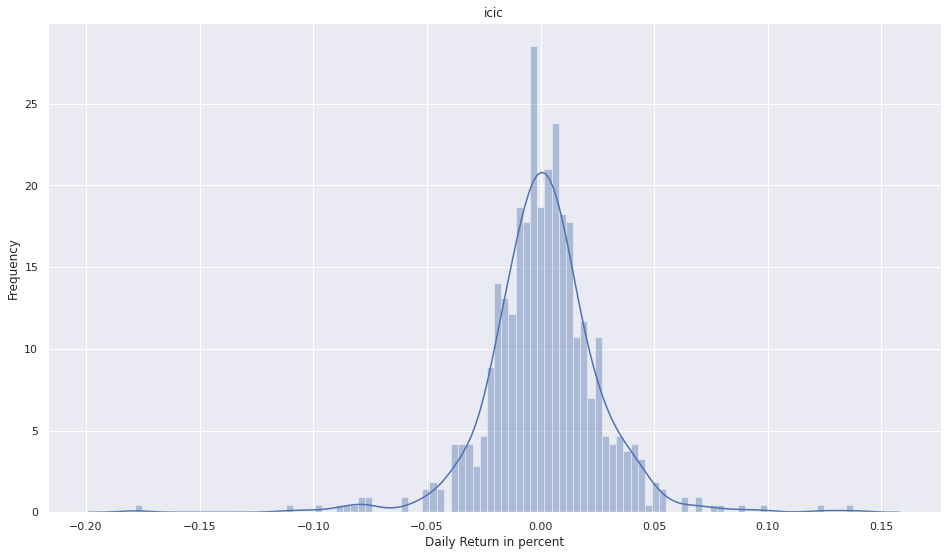

/home/raghav/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


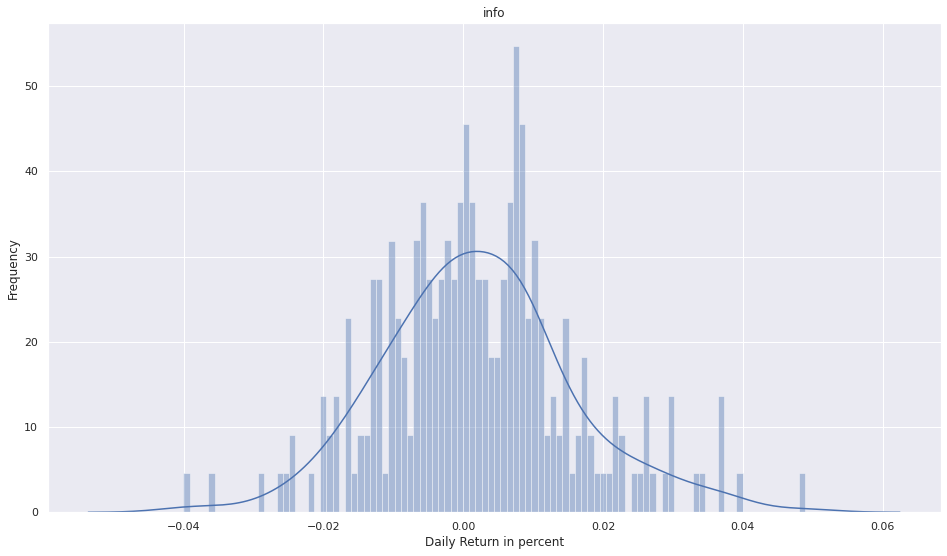

/home/raghav/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


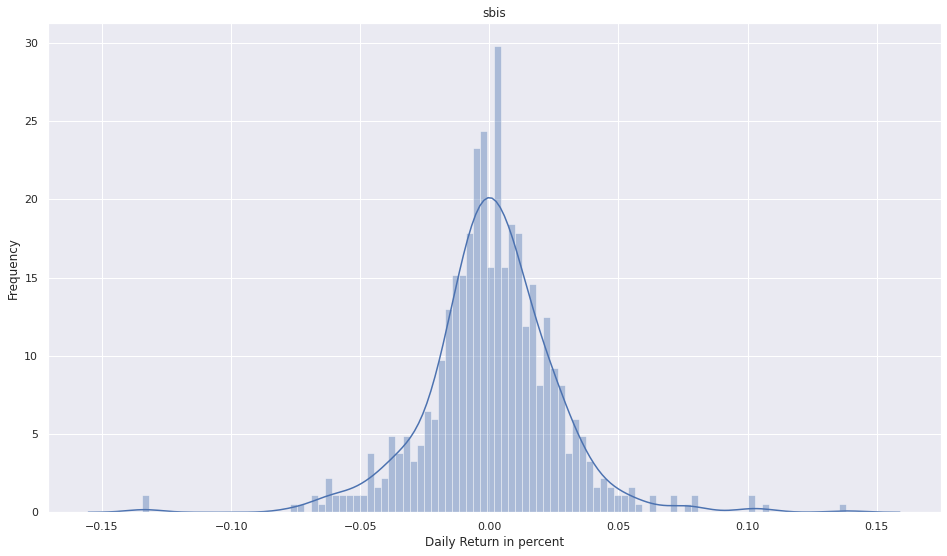

/home/raghav/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


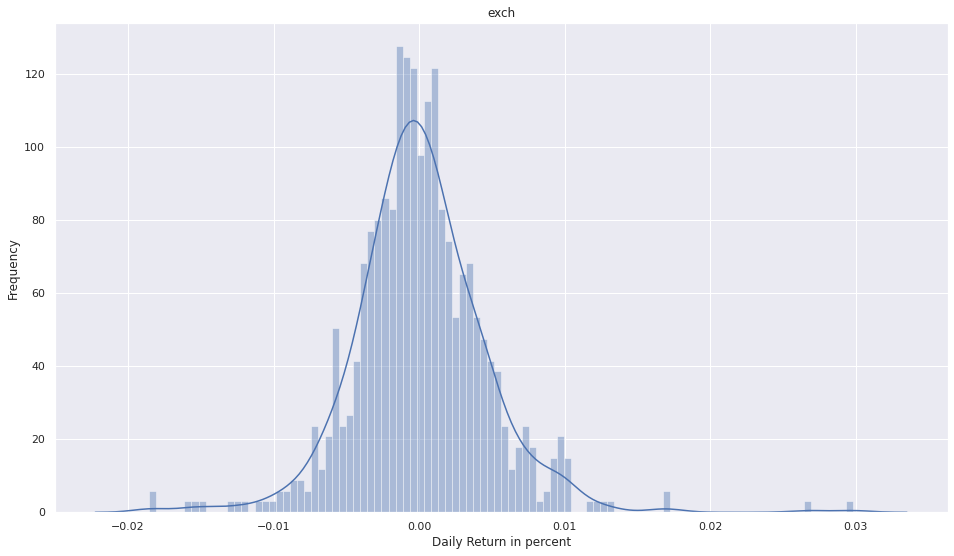

In [438]:
for i,data in enumerate(datasets):
#     print(data)
    sns.distplot(data['Return'].dropna(), bins=100)
    plt.ylabel('Frequency')
    plt.xlabel('Daily Return in percent')
    plt.title(f'{names[i]}')
    plt.savefig(f"{names[i]}_return_hist")
    plt.show()

In [451]:
companies = ['Cognizant', 'HDFC Bank', 'HCL Technologies', 'Infosys', 'ICICI Bank', 'SBI']

In [444]:
len(datasets)

7

In [452]:
ret_df = pd.DataFrame({companies[i]:df.set_index('Date')['Return'] for i, df in enumerate(datasets[:6])})
ret_df = ret_df
ret_df = ret_df.dropna()

<IPython.core.display.Javascript object>

In [459]:
ret_df.std()

Cognizant           0.014621
HDFC Bank           0.017024
HCL Technologies    0.016867
Infosys             0.020648
ICICI Bank          0.013717
SBI                 0.022743
dtype: float64

/home/raghav/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


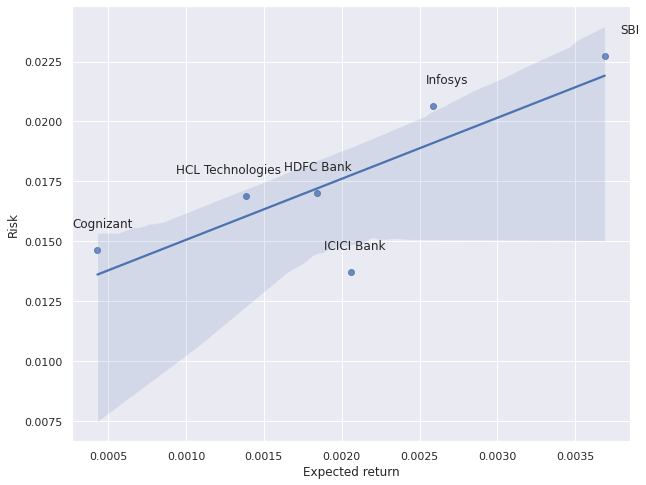

In [457]:

# Higher the risk, Higher the return !!

plt.figure(figsize=(10, 8))
sns.regplot(ret_df.mean(), ret_df.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for name, x, y in zip(ret_df.columns, ret_df.mean(), ret_df.std()):
    plt.annotate(name, xy=(x, y), xytext=(35, 20), textcoords='offset points', ha='right', va='bottom')

plt.savefig("risk_v_return")

# LSTM

In [333]:
[len(data) for data in datasets]

[694, 248, 678, 678, 248, 678, 699]

In [410]:
df = hdfc # cogn, hclt, hdfc, icic, info, sbis, exch
name = "hdfc"

In [411]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.round(len(dataset)*0.9))

training_data_len

610

In [412]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [413]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
print(train_data.shape)
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
win = 60
for i in range(win+1, len(train_data)):
    # predict segments of length 60 each
    x_train.append(train_data[i-win:i, 0])
    y_train.append(train_data[i, 0])
    
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(610, 1)
(549, 60, 1)


In [ ]:
hidden_sizes=[16,32,64,128,256]
rmses = []
for hidden_size in hidden_sizes:
    model = Sequential()
    model.add(LSTM(hidden_size, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(hidden_size, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    print("Training for hidden size: ", hidden_size)
    model.fit(x_train, y_train, batch_size=100, epochs=30, verbose=False)
    
    test_data = scaled_data[training_data_len - win:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(win, len(test_data)):
        x_test.append(test_data[i-win:i, 0])

    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    # print(predictions.shape)
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    rmses.append(rmse)

In [423]:
rmses

[34.800994490276715, 33.80163795969486, 32.18467037650479, 40.60972637735044]

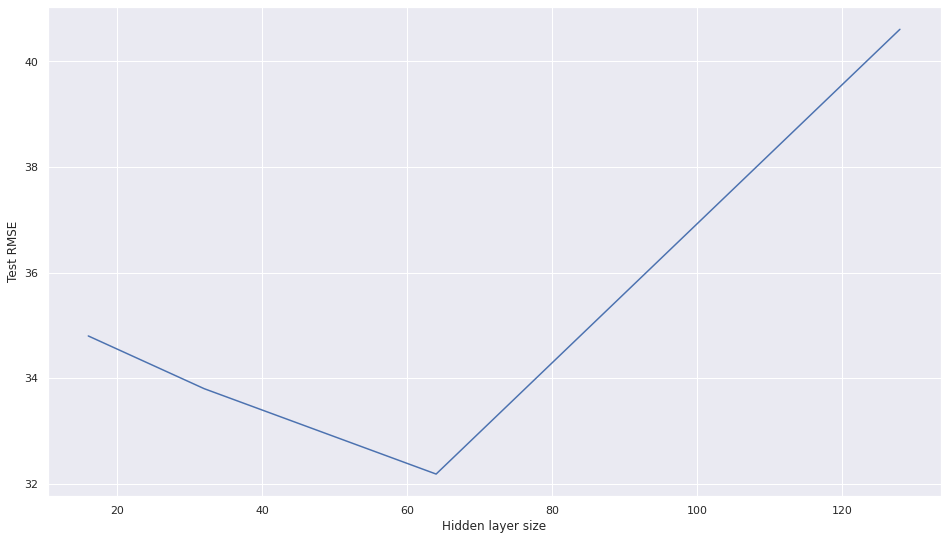

In [426]:
sns.lineplot(x=[16,32,64,128], y=rmses)
plt.xlabel("Hidden layer size")
plt.ylabel("Test RMSE")
plt.savefig("test_RMSE")
plt.show()

/tmp/ipykernel_1145/1282593840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


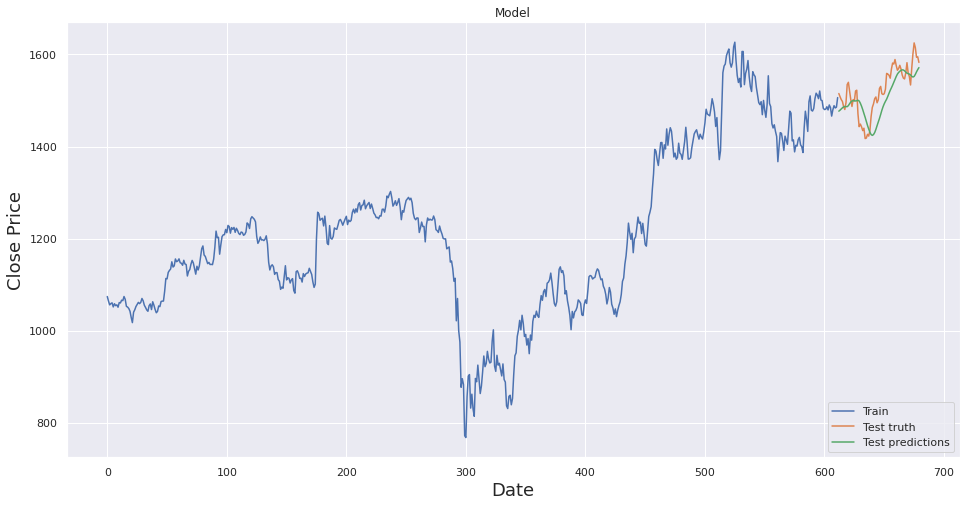

In [418]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test truth', 'Test predictions'], loc='lower right')
plt.savefig(f"{name}_close_pred")
plt.show()

In [419]:
valid.Close.mean()

1522.094114397059

In [12]:
x_train.shape # 

(2314, 60, 1)

In [59]:
tf.keras.utils.plot_model(model)

<IPython.core.display.Javascript object>

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [58]:
!pip install pydot